In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
data = json.load(open("SFdata//346.json"))

pixscale = 0.2 # arcsec
pixscale *= 0.3               # parsec
s0 = (0.3*.9)/2.355              # parsec
m = 1.05

In [4]:
r = pixscale * 10**np.array(data["log10 r"])
rgrid = pixscale * np.logspace(0.0, 2)

B = np.array(data["Unweighted B(r)"])

sig2 = data["Unweighted sigma^2"]
r0 = np.interp(sig2, B, r)

(31.87910585532852, 1.3585371476368509)

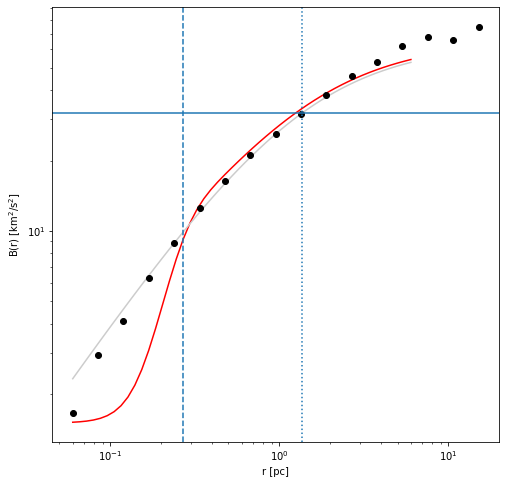

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
# Plot fit to unweighted strucfunc
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, s0, 1.5), color="red")
ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2)
ax.axvline( 2.355  * s0, linestyle="dashed")
ax.axvline(r0, linestyle="dotted")

ax.set(
    xscale = "log",
    yscale = "log",
#    ylim  = [1, 250],
#    xlim  = [1, 150],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)

sig2,r0

In [6]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [7]:
relative_uncertainty = 0.05
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 4.0
weights[0] /= 2.0
weights[1] /= 8.0
weights[2] /= 4.0
weights[3] /= 2.0

In [8]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.05)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2    31.8791        0      inf    False    


In [9]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1,
)

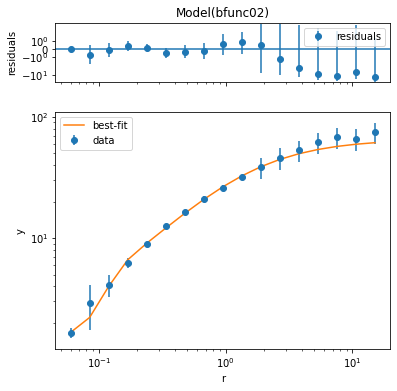

In [10]:
fig, _ = result2.plot()
fig.axes[0].set(
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale="log",
    yscale="log",
);

In [11]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 66
    # data points      = 17
    # variables        = 4
    chi-square         = 4.42167819
    reduced chi-square = 0.34012909
    Akaike info crit   = -14.8937987
    Bayesian info crit = -11.5609453
[[Variables]]
    r0:     1.40430257 +/- 0.04623991 (3.29%) (init = 1.358537)
    sig2:   31.87911 (fixed)
    m:      1.13399306 +/- 0.03023570 (2.67%) (init = 1.05)
    s0:     0.05582109 +/- 0.00587063 (10.52%) (init = 0.1146497)
    noise:  1.52915007 +/- 0.11980809 (7.83%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(r0, m)     = -0.826
    C(s0, noise) =  0.570
    C(r0, s0)    =  0.293
    C(m, s0)     = -0.226
    C(r0, noise) =  0.198
    C(m, noise)  =  0.109


In [12]:
#for p in result2.model.param_names:
#    result2.params[p].stderr = result2.params[p].value * 0.1

In [13]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.3288474528493489 < 1e-05 at iteration 2 and prob(r0=1.3118227573459391) = 0.4515672359853506 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.08144946580120835 < 1e-05 at iteration 4 and prob(s0=0.032338575938011205) = 0.745177680016327 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.01366423855082163 < 1e-05 at iteration 5 and prob(noise=0.9301095926543431) = 0.7999236572045915 < max(sigmas).
  warn(errmsg)


          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :      -inf      -inf      -inf   1.40430  +0.05110  +0.11439  +0.20495
 m    :  -0.11529  -0.06794  -0.03163   1.13399  +0.03132  +0.06654  +0.11137
 s0   :      -inf      -inf  -0.00978   0.05582  +0.00762  +0.01507  +0.02381
 noise:      -inf      -inf  -0.18184   1.52915  +0.12992  +0.26295  +0.42283


In [14]:
plt.style.use([
    "seaborn-poster",
])

In [15]:
plot_limits = {
    "s0": [0.0, 0.1],
    "m": [0.85, 1.4],
    "r0": [1, 2],
    "noise": [1, 2.5],
}

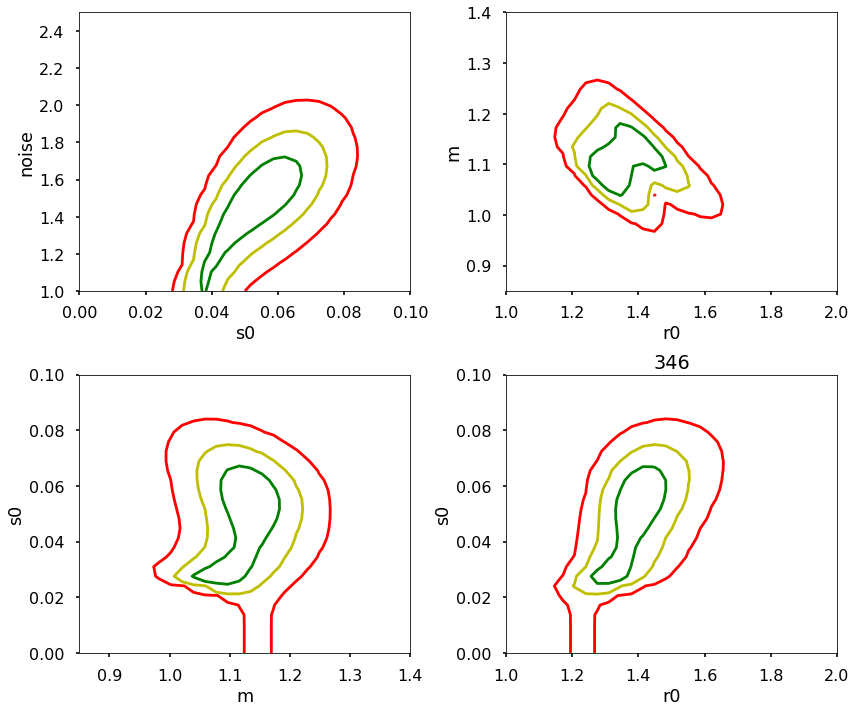

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('346')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [17]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 22.66827702522278 seconds ---
